<a href="https://colab.research.google.com/github/HKLeeeee/Studying_Algorithm/blob/main/multi_output_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm.auto import tqdm
import cv2

# from tensorflow.keras.applications import Densnet
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras import layers
import tensorflow.keras as keras
from tensorflow.data import Dataset

from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from itertools import product
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import *

# Ex 딸기

In [ ]:
IMAGE_SIZE = 320
MODEL_IMAGE_SIZE = 224
SECTION_CLASS_NUM = 8
DISEASE_CLASS_NUM = 3 ## 촬영유형이랑 질병 코드, 해충피해코드 고려해서 수정 필요
GROW_CLASS_NUM = 3 

In [ ]:
base_model= resnet50.ResNet50( ###### 이부분만 바꾸면 됨
          weights='imagenet',
          include_top=False,
          input_shape= (MODEL_IMAGE_SIZE, MODEL_IMAGE_SIZE,3))


base_model.trainable = False 

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
section_inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='section_inputs')
disease_inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='disease_inputs')
grow_inputs = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3), name='grow_inputs')

inputs = layers.concatenate([section_inputs, disease_inputs, grow_inputs])
inputs = layers.Conv2D(3, (3, 3), activation="relu")(inputs)

In [ ]:
inputs

<KerasTensor: shape=(None, 318, 318, 3) dtype=float32 (created by layer 'conv2d')>

In [ ]:
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
backbone_out = Dense(1024, activation='softmax')(x)


In [ ]:
backbone_out

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dense_3')>

In [ ]:

section_outputs = Dense(SECTION_CLASS_NUM, activation='softmax',
                        name = 'section_outputs')(backbone_out)
disease_outputs = Dense(DISEASE_CLASS_NUM, activation='softmax',
                        name = 'diease_outputs')(backbone_out)
grow_output = Dense(GROW_CLASS_NUM, activation='softmax',
                    name = 'grow_outputs')(backbone_out)

model = Model(inputs=inputs, 
              outputs=[section_outputs, disease_outputs, grow_output],
              name='strawberry multi-output model')

In [ ]:
model.summary()

Model: "strawberry multi-output model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 318, 318, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_3[0][0]']                
                                                                                                  
 global_average_pooling2d_3 (Gl  (None, 2048)        0           ['resnet50[5][0]']               
 obalAveragePooling2D)                                                                            
                                                                      

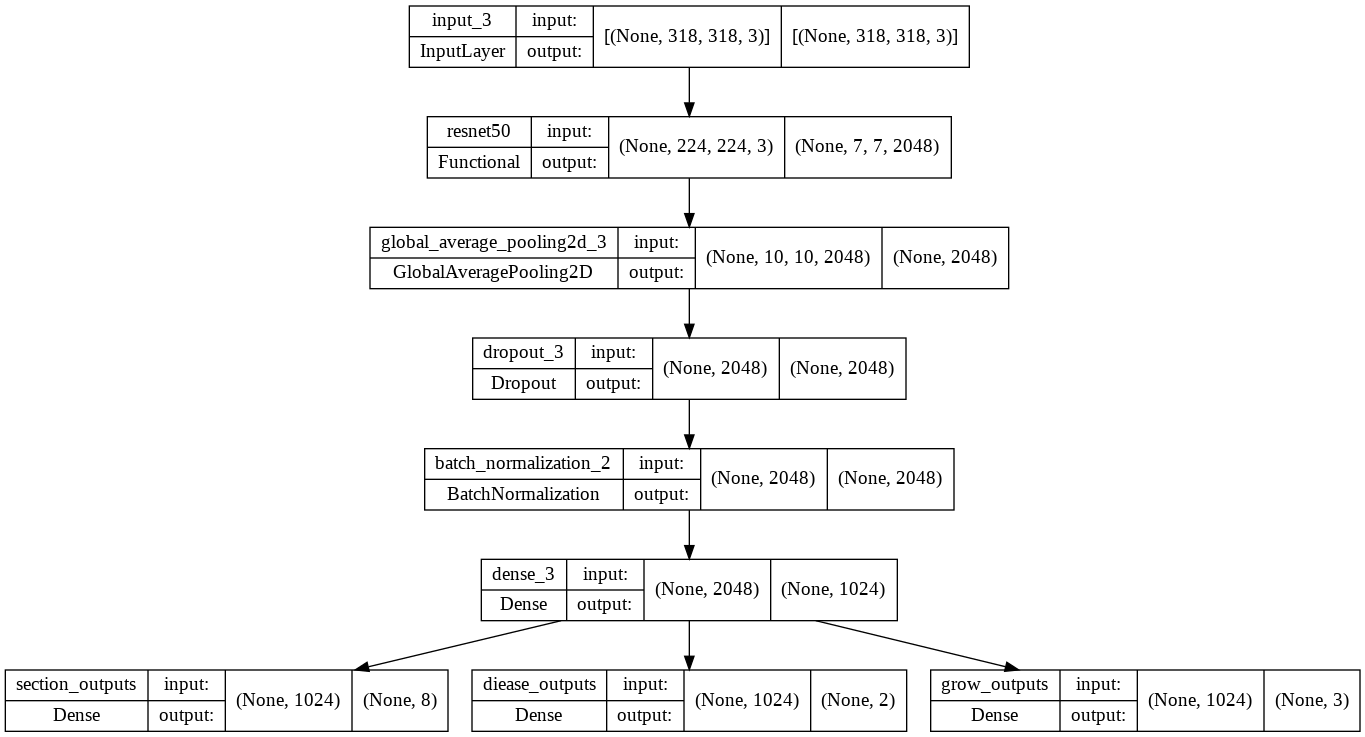

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss={
                  'section_outputs' : 'categorical_crossentropy',
                  'diease_outputs' : 'categorical_crossentropy',
                  'grow_outputs' : 'categorical_crossentropy'
              },
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accruary']) # 필요시 f1 score metrics custom

In [ ]:
#  model.fit({'age_inputs':age_train_images, 'gender_inputs':gender_train_images, 'emotion_inputs':emotion_train_images},
#          {'age_pred':age_train_labels, 'gender_pred':gender_train_labels, 'emotion_pred':emotion_train_labels},
#                  validation_split=0.2, 
#                        epochs=5, 
#                             batch_size=16)

## TODO
- 클래스별로 데이터 수 비슷하게 조절하기



- 질병 유무. 있다면 어떤 병까지 : 이부분의 클래스 어떻게 구성할지?

1안
- 정상
- 딸기잿빛곰팡이병
- 딸기흰가루병


2안
- 정상
- 질병
  - 딸기잿빛곰팡이병
  - 딸기흰가루병
  - 무슨 질병인지 모름